# 机器学习工程师纳米学位
## 模型评价与验证
## 项目 1: 预测波士顿房价


欢迎来到机器学习工程师纳米学位的第一个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。代码栏有TODO的表示接下来的内容中有需要你必须实现的功能，请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题，请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。审阅者将会根据你对问题的回答和撰写代码所实现的功能来对你的项目进行审阅。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 导入数据
在这个项目中，你将利用爱荷华州埃姆斯的个人住宅物业销售情况所整理的波士顿房屋信息数据来训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练好的模型可以被用来对房屋的价值做特定预测。对于房地产经纪人等类型的日常工作来说，这样的预测模型已经被证明非常有价值。

此项目的数据集来自[kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)的原始数据，未经过任何处理。该数据集统计了2006年至2010年波士顿个人住宅销售情况，包含2900多个观测资料（其中一半是训练数据，即我们的`housedata.csv`文件）。更多文档信息可以参考作者的[document](http://jse.amstat.org/v19n3/decock.pdf)（可不看），以及项目附件`data_description.txt`文件（特征描述文件，要看）。

运行下面区域的代码以载入波士顿房屋训练数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [1]:
# 载入此项目需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # use seaborn style

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**问题1：加载波士顿房屋训练数据`housedata.csv`**：

In [2]:
# 1 TODO：载入波士顿房屋的数据集：使用pandas载入csv，并赋值到data_df
data_df = pd.read_csv('housedata.csv')

# 成功载入的话输出训练数据行列数目
print("Boston housing dataset has {} data points with {} variables each.".format(*data_df.shape))

Boston housing dataset has 1460 data points with 81 variables each.


---
## 第二步. 观察数据
这个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解数据。

**问题2.1：打印并观察前5条`data_df`数据**

In [3]:
# 2.1 TODO: 打印出前5条data_df
data_df.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**问题2.2：Id特征对我们训练数据没有任何用处，在`data_df`中删除`'Id'`列数据**

In [4]:
data_df = data_df.drop('Id', axis=1)

**问题2.3：使用describe方法观察`data_df`各个特征的统计信息：**

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_df.describe())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **目标变量**：` SalePrice`，是我们希望预测的变量。
- **特征**：除` SalePrice`外的属性都是特征，给我们提供了每个数据点的数量相关的信息。

**问题2.4：通过观察数据，结合`data_description.txt`特征描述，整理出你认为跟目标变量最相关的5个特征，并进行部分解释**

回答问题2.4：

* MSSubClass 房屋所在区域, 人口密度越高均价越高
* LotArea 房屋面积, 面积跟房价正相关
* MSSubClass 住宅类型, 住宅类型也跟房价也有关系
* OverallCond 总体评价, 评价分数和房价正相关
* TotRmsAbvGrd 房间数量, 房间数量和房价也有正相关

根据现实经验, 这些特性和房屋的价格都有密切联系


---
## 第三步. 数据预处理
关于第三步，我们的数据不可能是百分百的干净数据（有用数据），总会在采集整理时有些”失误“，“冗余”，造成脏数据，所以我们要从数据的正确性，完整性来清理下数据。
- **正确性**：一般是指有没有异常值，比如我们这个数据集中作者的[document](http://jse.amstat.org/v19n3/decock.pdf)所说：
`I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.`
建议我们去掉数据中`'GrLivArea'`中超过4000平方英尺的房屋，当然本数据集还有其他的异常点，这里不再处理。
- **完整性**：采集或者整理数据时所造成的空数据决定了数据的完整性，通常我们会有一定的方法处理这些数据，以下我们使用以下两种方法，一是[这个](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456),即选择丢弃过多空数据的特征（或者直接丢弃数据行，前提是NA数据占比不多），二是填补数据，填补的方法也很多，均值/中位数/众数填充等等都是好方法。

**问题3.1：画出`'GrLivArea'`和`'SalePrice'`的关系图，x轴为`'GrLivArea'`，y轴为`'SalePrice'`，观察数据**

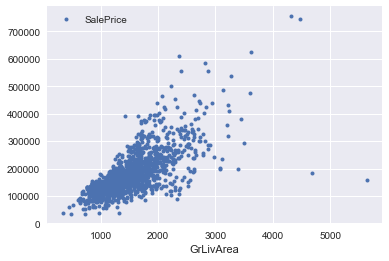

In [6]:
data_df.plot(x='GrLivArea', y='SalePrice', style='o', ms=4)

**问题3.2：通过上图我们可以看到那几个异常值，即`'GrLivArea'`大于4000，但是`'SalePrice'`又极低的数据，从`data_df`删除这几个异常值，删除后重新绘制`'GrLivArea'`和`'SalePrice'`的关系图，确认异常值已删除。**

In [7]:
# 3.2.1 TODO 从train_df删除GrLivArea大于4000且SalePrice低于300000的值
data_df = data_df[~((data_df.GrLivArea > 4000) & (data_df.SalePrice < 200000))]

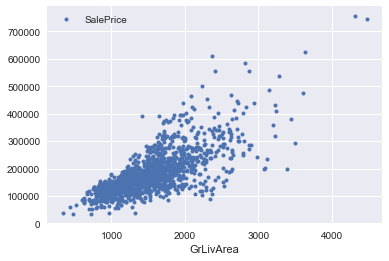

In [8]:
# 3.2.2 TODO 重新绘制GrLivArea和SalePrice的关系图，确认异常值已删除
data_df.plot(x='GrLivArea', y='SalePrice', style='o', ms=4)

**问题3.3：筛选出过多空数据的特征，我们这个项目定为筛选出超过25%的空数据的特征**

In [9]:
limit_percent = 0.25
limit_value = len(data_df) * limit_percent
# 3.3.1 TODO 统计并打印出超过25%的空数据的特征

print(list(data_df.columns[data_df.isnull().sum() > limit_value]))




['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


**如果你整理出的特征是`'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'`，那就说明你统计对了，接着我们查看`data_description.txt`文件，就会发现，这些并非一定是空缺数据，而没有游泳池，篱笆等也会用NA来表示，那么就不需要删除这些特征了，而是用`None`来填充`NA`数据。**

**问题3.4：根据`data_description.txt`特征描述填充空数据，数据填充什么已经整理好了，请按提示要求来进行填充**

In [10]:
# 直接运行不用修改
# 确定所有空特征
missing_columns = list(data_df.columns[data_df.isnull().sum() != 0])
# 确定哪些是类别特征，哪些是数值特征
missing_numerical = list(data_df[missing_columns].dtypes[data_df[missing_columns].dtypes != 'object'].index)
missing_category = [i for i in missing_columns if i not in missing_numerical]
print("missing_numerical:",missing_numerical)
print("missing_category:",missing_category)

('missing_numerical:', ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])
('missing_category:', ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'])


In [11]:
# 需要填充众数的特征
fill_Mode = ['Electrical'] 
# 需要填充None的特征
fill_None = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
             'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
# 需要填充0的特征
fill_0 = ['GarageYrBlt']
# 需要填充中位数的特征
fill_median = ['LotFrontage', 'MasVnrArea']
# 3.4.1 TODO：按需填补上面数据

for mode in fill_Mode:
    data_df = data_df.fillna(value={mode: data_df[mode].mode()})

for non in fill_None:
    data_df = data_df.fillna(value={non: np.nan})
    
for zero in fill_0:
    data_df = data_df.fillna(value={zero: 0})

for median in fill_median:
    data_df = data_df.fillna(value={median: data_df[median].median()})
    

        

---
## 第四步. 探索性数据分析（EDA）
在统计学中，探索性数据分析（EDA）是一种分析数据集以概括其主要特征的方法，通常使用可视化方法。虽然可以使用统计模型，但EDA主要是为了了解数据在形式化建模或假设测试任务之外能告诉我们什么。探索性数据分析是John Tukey提出的，鼓励业界利用统计学来研究数据，并尽可能提出假设，尽可能生成新的数据收集和实验。

### 一、单变量分析（目标变量分析）
既然要预测`'SalePrice'`，那么自然要先详细了解我们的目标变量。

**问题4.1：绘制`'SalePrice'`，并说明该直方图属于什么[分布](https://zh.wikipedia.org/wiki/%E5%81%8F%E5%BA%A6)**

(array([ 22., 126., 380., 342., 228., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <a list of 20 Patch objects>)

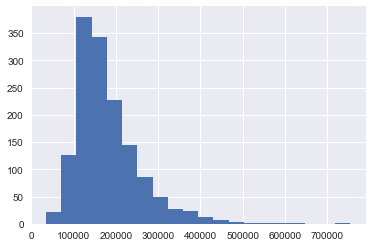

In [12]:
# 4.1 TODO
list(data_df['SalePrice'].values)

num_bins = 20
fig, ax = plt.subplots()
ax.hist(data_df['SalePrice'].values, num_bins)

回答问题4.1：右偏态

既然了解了目标变量，那么我们现在要从特征继续分析了，我们的`data_df`总共有81个特征，我们不可能用这么高维度的数据来进行预测，自然要剔除那些无关紧要的特征（噪声），使用真正关键的特征来进行模型训练，那么下面就让我们从主观与客观的两个方面来筛选特征。
### 二、多变量主观分析（特征与目标变量的关系）

**问题4.2：问题2.4回答的5个你认为与`'SalePrice'`最相关特征，绘制他们分别与`'SalePrice'`的关系图，x轴为自选特征，y轴为`'SalePrice'`，根据关系图所示进行总结说明问题2.4的所猜测的关系是否正确**

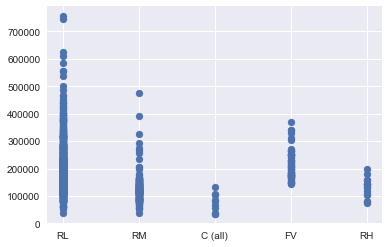

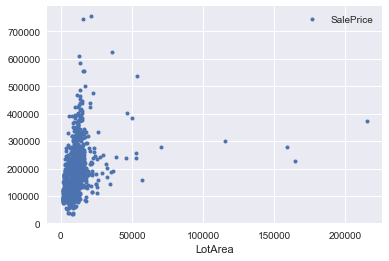

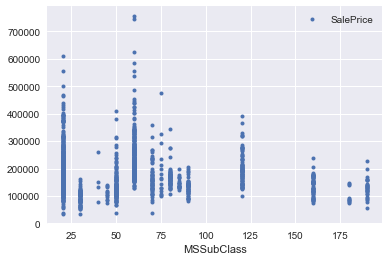

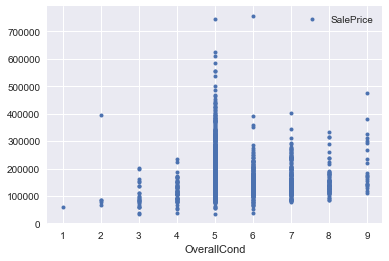

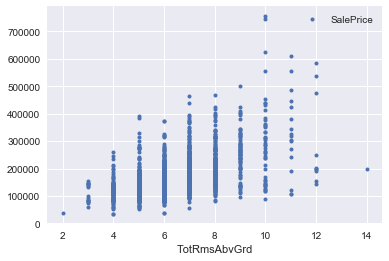

In [13]:
# 4.2 TODO
"""MSZoning 房屋所在区域, 人口密度越高均价越高
LotArea 房屋面积, 面积跟房价正相关
MSSubClass 住宅类型, 住宅类型也跟房价也有关系
OverallCond 总体评价, 评价分数和房价正相关
TotRmsAbvGrd 房间数量, 房间数量和房价也有正相关
"""

plt.scatter(x=data_df['MSZoning'], y=data_df['SalePrice'])

for feature in ['LotArea', 'MSSubClass', 'OverallCond', 'TotRmsAbvGrd']:
    data_df.plot(x=feature, y='SalePrice', style='o', ms=4)


*MSZoning* *MSSubClass* 对房价的影响从图标上看并不明显, 其他特征都有正相关性

### 三、多变量客观分析（特征与目标变量的关系）

主观分析方面是自己选出了几个认为和`'SalePrice'`强相关的特征，但是这种是没有客观依据的，而且如果特征极其多，很难清晰的看到特征与目标变量之间的关系，就需要利用统计知识来进行多变量分析了。我们常使用热图heatmap结合corr来进行客观分析，热图Heatmap可以用颜色变化来反映变量之间的相关性二维矩阵或说相关性表格中的数据信息，它可以直观地将数据值的大小以定义的颜色深浅表示出来。这个项目，为了简化训练，我们以相关性绝对值大于0.5为界来选取我们需要的特征。

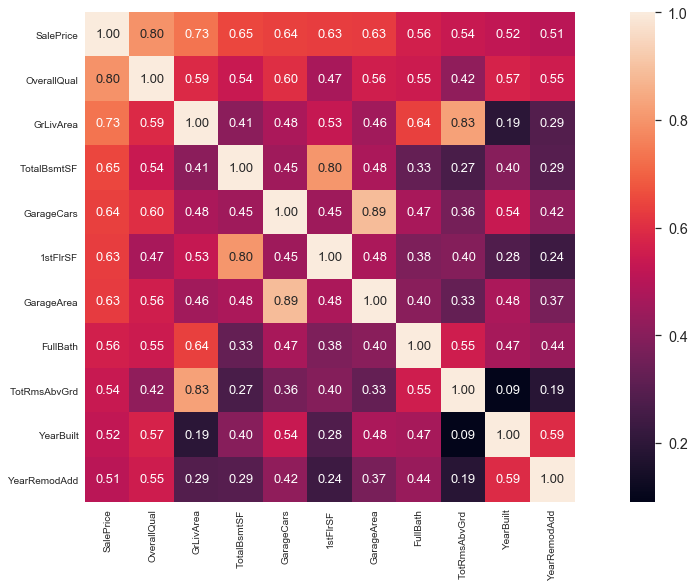

In [14]:
# 不用修改直接运行
corrmat = data_df.corr().abs()
top_corr = corrmat[corrmat["SalePrice"]>0.5].sort_values(by = ["SalePrice"], ascending = False).index
cm = abs(np.corrcoef(data_df[top_corr].values.T))
f, ax = plt.subplots(figsize=(20, 9))
sns.set(font_scale=1.3)
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size': 13}, 
                 yticklabels=top_corr.values, xticklabels=top_corr.values);
data_df = data_df[top_corr]

---
## 第五步.特征分析
有这么一句话在业界广泛流传：数据特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。特征工程，是整个数据分析过程中不可缺少的一个环节，其结果质量直接关系到模型效果和最终结论。从上面两步中我们得到了“干净”的数据，从庞大的特征群中筛选出了最相关的特征，也了解了我们目标数据的分布，那么接下来，我们从创造性方面来对我们的特征进行“改造”。
- **创造性**：创造性主要是说两种情况，一种是对现有数据的处理，比如类别的One-hotEncoder独热编码或者LabelEncoder标签编码，数值的区间缩放，归一化标准化等等，另一种就是创造根据一些一个新的特征，例如某特征groupby后，或者某些特征组合后来创造新特征等等。

因为我们特别筛选出来的特征都为数值类型特征，所以我们只做标准化的操作：这个项目是一个回归的项目，而我们的回归算法对标准正态分布预测较为准确，从我们的目标数据可以看出数据是一个偏态分步，那么我们使用log将数据从偏态分步转换为标准正态分布，最后进行标准化。

In [15]:
# 不要修改，直接运行
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler

data_df['SalePrice'] = np.log1p(data_df['SalePrice'])
numeric_features = list(data_df.columns)
numeric_features.remove('SalePrice')
for feature in numeric_features:
    #all_data[feat] += 1
    data_df[feature] = boxcox1p(data_df[feature], 0.15)

scaler = StandardScaler()
scaler.fit(data_df[numeric_features])
data_df[numeric_features] = scaler.transform(data_df[numeric_features])

---
## 第六步.模型实现

### 数据分割
这部分正式开始模型实现与调参，首先我们要把`data_df`按特征和目标变量分开。

**问题6.1：将`data_df`分割为特征和目标变量**

In [16]:
# 6.1 
features = data_df.drop(['SalePrice'], axis=1)
labels = data_df['SalePrice']

接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重新排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。

 
**问题6.2：将`features`，`labels`分隔为`X_train, X_test, y_train, y_test`**
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 42) # 6.2 TODO

**问题6.3：为什么要将数据集分为训练数据与测试数据？**

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

回答问题6.3：

用更多的数据来训练模型可以提高模型的泛化能力, 我们需要把数据集中的部分数据作为测试集来评估模型的泛化能力, 避免过度拟合


### **定义衡量标准**

如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

**问题6.4：在下方代码的 `performance_metric` 函数中，你要实现：**
- 使用 `sklearn.metrics` 中的 [`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。

In [18]:
# TODO： 导入r2_score
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    score =  r2_score(y_true, y_predict)

    return score

**问题6.4 - 拟合程度**

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示**：使用`performance_metric`函数来计算模型的决定系数。

In [19]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


回答问题6.4：

这个模型较为成功地描述了变化.

预测数值和真实数值的变化趋势是大致相同的，同时各个点的预测值接近了真实数值.

评分函数计算出的r2_score数值为0.923也比较接近与1

### **学习曲线**

后面的课程中会对各个算法模型有详细的介绍，我们这里就先选用决策树算法来进行训练（算法本身不是本次重点）。

现在我们的重点是来看一下不同参数下，模型在训练集和验证集上的表现。这里，我们专注于决策树和这个算法的一个参数 `'max_depth'`。用全部训练集训练，选择不同`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。画出模型的表现来对于分析过程十分有益，这可以让我们看到一些单看结果看不到的行为。

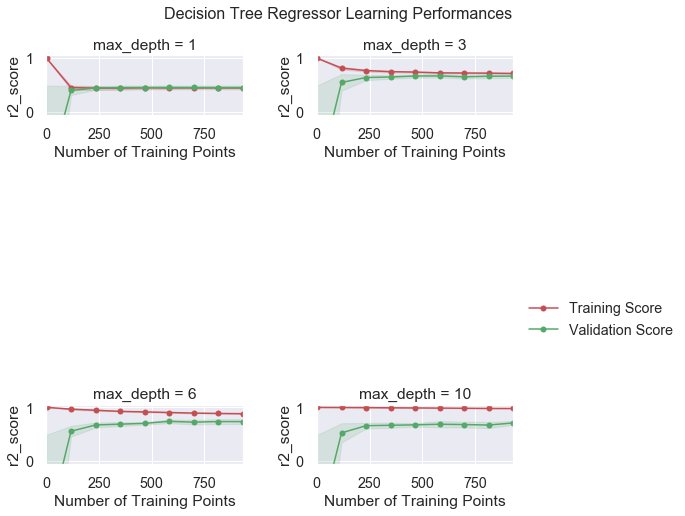

In [20]:
# 根据不同的训练集大小，和最大深度，生成学习曲线
vs.ModelLearning(X_train, y_train)

**问题 6.5：选择上述图像中的其中一个，并给出其最大深度。随着训练数据量的增加，训练集曲线（Training）的评分有怎样的变化？验证集曲线（validation）呢？如果有更多的训练数据，是否能有效提升模型的表现呢？**

**提示：**学习曲线的评分是否最终会收敛到特定的值？

回答问题6.5：

如第二张图所示, 随着训练数据的增加,训练集曲线的评分逐渐降低, 而验证集曲线评分逐渐升高.

如果有更多的训练数据对模型表现的提升应该不会很明显了, 因为可以很明显看到训练数据大于250之后两条评分曲线趋于稳定

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练集的变化，一个是验证集的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

运行下方区域中的代码，并利用输出的图形并回答下面的两个问题。

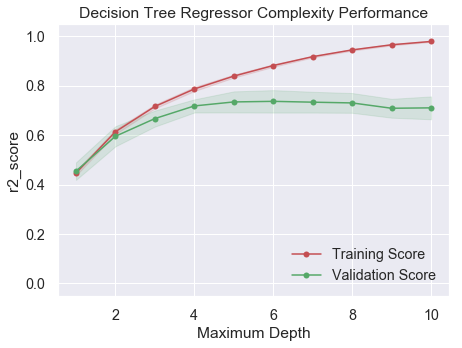

In [21]:
# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(X_train, y_train)

**问题6.6：当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？当模型以最大深度10训练时，情形又如何呢？图形中的哪些特征能够支持你的结论？你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？**
  
**提示：** 你如何得知模型是否出现了偏差很大或者方差很大的问题？

回答问题6.6：

最大深度为1时, r2评分在0.45左右, 说明偏差较大. 而深度为10时, 训练集和测试集的评分出现了较大的差异, 说明方差较大

### 网格搜索

**问题 6.7：什么是网格搜索法？如何用它来优化模型？**

回答问题6.7：网格搜索法把一种建模方法的参数列成表格，把参数分别在一定范围内取值，再根据这张表上面特定的配置分别训练模型。根据训练模型在评分函数（如F1分数）的表现来选择表格中最优的一种参数搭配，得到最优化的模型配置。

### 交叉验证

**问题 6.8:**
- 什么是K折交叉验证法（k-fold cross-validation）？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)是如何结合交叉验证来完成对最佳参数组合的选择的？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)中的`'cv_results_'`属性能告诉我们什么？
- 网格搜索时如果不使用交叉验证会有什么问题？交叉验证又是如何解决这个问题的？

**提示：** 在下面 fit_model函数最后加入 `print(pd.DataFrame(grid.cv_results_))` 可以帮你查看更多信息。

回答问题6.8：

K折交叉验证法是将训练数据集分成K次折叠,其中K-1次折叠用于模型训练,另外一个折叠用于性能评估,重复K次,并使用K次的验证集平均值评估模型性能

GridSearchCV是对同一训练集和测试集,用一组模型训练参数分别进行训练,比较训练结果后得出最佳训练参数

cv_results_ 属性能告诉我们测试集得分,及其平均分,方差,以及训练时间

K折交叉验证避免了因数据集划分的偶然性而造成评分不准的问题。网格搜索中对每一组参数对应的模型，使用不同的训练集和验证集来评分，然后取K次评分的平均来保证评分的客观性


### 训练最优模型
在这个练习中，你需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得到的模型是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `max_depth` 参数。你可以把`max_depth` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

**问题6.9:**

在下方 `fit_model` 函数中，你需要做的是：
1. **定义 `cross_validator` 变量**: 使用 `sklearn.model_selection` 中的 [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) 创建一个交叉验证生成器对象;
2. **定义 `regressor` 变量**: 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数;
3. **定义 `params` 变量**: 为 `max_depth` 参数创造一个字典，它的值是从1至10的数组;
4. **定义 `scoring_fnc` 变量**: 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
 将 `performance_metric` 作为参数传至这个函数中；
5. **定义 `grid` 变量**: 使用 `sklearn.model_selection` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 创建一个网格搜索对象；将变量`regressor`, `params`, `scoring_fnc`和 `cross_validator` 作为参数传至这个对象构造函数中；

In [22]:
# 6.9 TODO 导入 'KFold' 'DecisionTreeRegressor' 'make_scorer' 'GridSearchCV' 
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    cross_validator = KFold()
    
    regressor = DecisionTreeRegressor()

    params = {'max_depth': range(1,11)}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    #print pd.DataFrame(grid.cv_results_)[['param_max_depth', 'mean_test_score']]

    # 返回网格搜索后的最优模型
    return grid.best_estimator_

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [23]:
# 基于训练数据，获得最优模型
optimal_reg = fit_model(X_train, y_train)

# 输出最优模型的 'max_depth' 参数
print("Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth']))

Parameter 'max_depth' is 6 for the optimal model.


---
## 第七步.做出预测

最终，使用我们确认好的参数来对测试数据进行预测，完成下面的问题，来看看我们的训练结果如何吧

**问题7.1：填入上题所确认的最优参数，查看测试结果**

In [29]:
depth = 6
regressor = DecisionTreeRegressor(max_depth = depth)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = performance_metric(y_train, regressor.predict(X_train))
print("The train R2 score is ",score)
score = performance_metric(y_test, y_pred)
print("The test R2 score is ",score)

('The train R2 score is ', 0.8710305599589345)
('The test R2 score is ', 0.7596286508573477)


**问题7.2：你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？**

回答问题7.2：

对比上面的学习曲线, 目前的模型能达到的r2 score约为0.75, 即表示可以描述大概75%的变化.

训练集的R2分数为0.87 > 验证集的R2分数, 可以看出有一定的过拟合.

---
## 选做

至此，我们的整个训练流程基本结束，当然我们只调试了`max_depth`参数，让我们达到了上面的那个最优结果，尝试修改问题6.9中的代码，修改[更多决策树的参数](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)，来提高分数，期待你得到更好的成绩。